# Markering Campaign Analysis Report


## Introduction




In [6]:
dataset_info = df.shape
print(f"The dataset contains {dataset_info[0]} campaigns and {dataset_info[1]} features, spanning multiple regions and device types.")

The dataset contains 500 campaigns and 16 features, spanning multiple regions and device types.


## Data Preparation
### The data didn't have any nulls so didn't have to handle missing values.

In [5]:
# Checking for nulls and relevant data type!
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Campaign ID           500 non-null    object 
 1   Campaign Type         500 non-null    object 
 2   Start Date            500 non-null    object 
 3   End Date              500 non-null    object 
 4   Impressions           500 non-null    int64  
 5   Clicks                500 non-null    float64
 6   Conversions           500 non-null    float64
 7   Cost                  500 non-null    float64
 8   Target Audience       500 non-null    object 
 9   Device Type           500 non-null    object 
 10  Geographic Region     500 non-null    object 
 11  Ad Content Type       500 non-null    object 
 12  Budget                500 non-null    float64
 13  Revenue               500 non-null    float64
 14  Cost per acquisition  500 non-null    float64
 15  ROI                   5

In [4]:
#uploading the dataset
import pandas as pd
df = pd.read_csv('marketing_campaign_data.csv')
print(df.head())

    Campaign ID  Campaign Type Start Date   End Date  Impressions   Clicks  \
0  Campaign_001   Social Media   4/8/2024  7/26/2024       257984   6664.0   
1  Campaign_002          Email  7/26/2024  2/10/2024        79454  27637.0   
2  Campaign_003   Social Media  7/10/2024  6/18/2024       164717  43024.0   
3  Campaign_004          Email  5/25/2024  5/26/2024       328813   2679.0   
4  Campaign_005  Advertisement   3/1/2024  1/14/2024        10705  29690.0   

   Conversions     Cost Target Audience Device Type Geographic Region  \
0       2368.0  38877.0  General Public     Desktop           Oceania   
1       2088.0  19500.0         Seniors     Desktop           Oceania   
2        874.0  24532.0          Adults     Desktop           Oceania   
3       3033.0   8881.0  General Public     Desktop            Africa   
4       2952.0  42957.0           Youth      Mobile              Asia   

  Ad Content Type   Budget  Revenue  Cost per acquisition        ROI  
0            Text  27

In [48]:
#converting columns to strings to for accurate calculations.
df['Cost'] = df['Cost'].astype(str).replace({'\$': '', ',': ''}, regex=True).astype(float)
df['Revenue'] = df['Revenue'].astype(str).replace({'\$': '', ',': ''}, regex=True).astype(float)


In [8]:
#checking the data
print(df[['Campaign ID', 'Cost', 'Revenue', 'ROI', 'Cost per acquisition']].head())


    Campaign ID     Cost  Revenue        ROI  Cost per acquisition
0  Campaign_001  38877.0  13705.0  -6474.78%                 16.42
1  Campaign_002  19500.0  57367.0  19418.97%                  9.34
2  Campaign_003  24532.0  67028.0  17322.68%                 28.07
3  Campaign_004   8881.0  23668.0  16650.15%                  2.93
4  Campaign_005  42957.0  95837.0  12309.98%                 14.55


In [9]:
#calculating summary metrics
summary_metrics = df[['Impressions', 'Clicks', 'Conversions', 'Cost', 'Revenue', 'Cost per acquisition', ]].describe()
print("Summary Metrics:\n", summary_metrics)

Summary Metrics:
         Impressions        Clicks  Conversions          Cost       Revenue  \
count     500.00000    500.000000   500.000000    500.000000    500.000000   
mean   250105.52000  24853.444000  2543.806000  24333.462000  56151.478000   
std    143492.03677  14218.030457  1391.451812  14301.416832  26599.461503   
min     10372.00000   1141.000000   120.000000   1049.000000  10287.000000   
25%    126764.25000  12245.000000  1337.000000  11355.750000  32867.750000   
50%    246088.00000  25698.500000  2530.000000  24394.500000  57912.000000   
75%    372777.50000  36528.750000  3647.000000  36860.250000  79044.500000   
max    497391.00000  49652.000000  4998.000000  49933.000000  99886.000000   

       Cost per acquisition  
count            500.000000  
mean              17.426840  
std               26.131857  
min                0.310000  
25%                4.707500  
50%                9.590000  
75%               18.617500  
max              213.160000  


## Campaign type performance
We analyzed the performance of different campaign types.

In [44]:
#top 5 campaigns by ROI!
top_campaigns_by_roi = df.sort_values(by='ROI', ascending=False).head(5)
print("\n Top Five Campaigns by ROI:\n", top_campaigns_by_roi[['Campaign ID', 'ROI', 'Revenue', 'Cost']])


 Top Five Campaigns by ROI:
       Campaign ID        ROI  Revenue    Cost
253  Campaign_254  807198.48  86051.0  1053.0
393  Campaign_394  675406.39  75052.0  1095.0
74   Campaign_075  582287.00  66040.0  1115.0
152  Campaign_153  509758.13  68764.0  1323.0
187  Campaign_188  501708.54  81464.0  1592.0


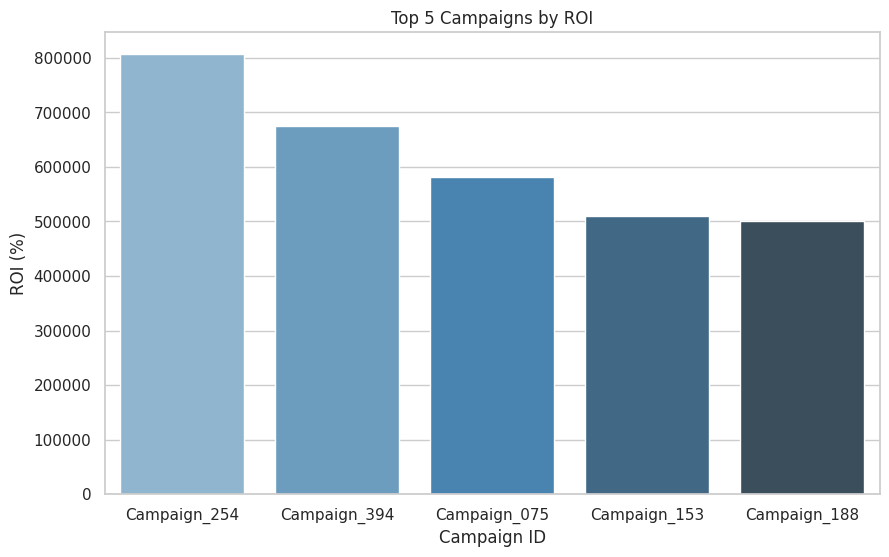

In [49]:
# bar chart of top five campaigns by ROI!
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(x='Campaign ID', y='ROI', data=top_campaigns_by_roi, palette='Blues_d', hue='Campaign ID', dodge=False)
plt.title('Top 5 Campaigns by ROI')
plt.xlabel('Campaign ID')
plt.ylabel('ROI (%)')
plt.legend([],[], frameon=False)
plt.show()

In [12]:
#top 5 campaigns by conversions
top_campaigns_by_conversions = df.sort_values(by='Conversions', ascending=False).head(5)
print("\n Top Five Campaigns by Conversions:\n", top_campaigns_by_conversions[['Campaign ID', 'ROI','Revenue', 'Cost']])


 Top Five Campaigns by Conversions:
       Campaign ID        ROI  Revenue     Cost
228  Campaign_229  13850.11%  96011.0  40256.0
458  Campaign_459   4238.70%  16356.0  11487.0
245  Campaign_246   7357.69%  78580.0  45271.0
29   Campaign_030  12123.60%  97012.0  43850.0
406  Campaign_407    241.69%  30341.0  29625.0


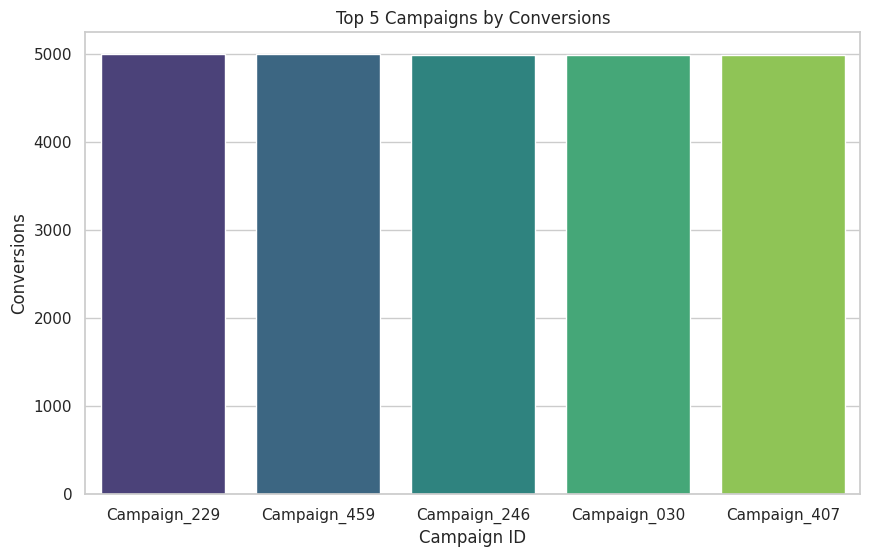

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Campaign ID', y='Conversions', data=top_campaigns_by_conversions, palette='viridis', hue='Campaign ID', dodge=False)
plt.title('Top 5 Campaigns by Conversions')
plt.xlabel('Campaign ID')
plt.ylabel('Conversions')
plt.legend([],[], frameon=False)
plt.show()

In [21]:
#top 5 camapigns by revenue!
top_campaigns_by_revenue = df.sort_values(by='Revenue', ascending=False).head(5)
print("\n Top Five Campaigns by Revenue:\n", top_campaigns_by_revenue[['Campaign ID','Cost', 'ROI', 'Budget']])


 Top Five Campaigns by Revenue:
       Campaign ID     Cost        ROI   Budget
200  Campaign_201  13614.0  63370.06%  31941.0
413  Campaign_414  49641.0  10045.93%  71044.0
89   Campaign_090  28066.0  25390.86%  42999.0
38   Campaign_039   9297.0  96684.95%  25898.0
338  Campaign_339  13021.0  66152.37%   6516.0


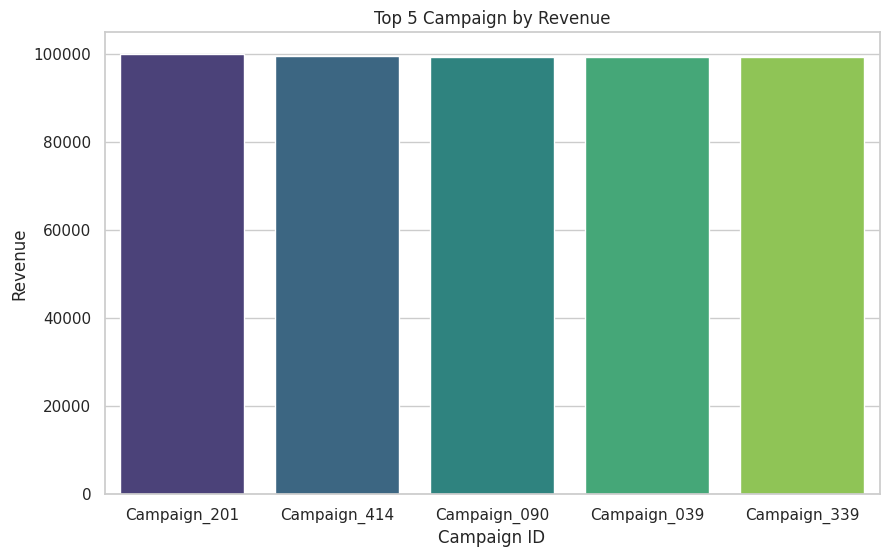

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x="Campaign ID", y="Revenue", palette='viridis', hue="Campaign ID", legend=False, data=top_campaigns_by_revenue)
plt.title('Top 5 Campaign by Revenue')
plt.xlabel('Campaign ID')
plt.ylabel('Revenue')
plt.show()

In [25]:
# Analyzing performance by segment
segment_performance = df.groupby('Target Audience')['ROI'].mean().sort_values(ascending=False)
print("Segment Performance:\n", segment_performance)

Segment Performance:
 Target Audience
Adults                    60361.533243
Business Professionals    40653.036000
Youth                     35242.326100
General Public            33616.520575
Seniors                   30687.622784
Name: ROI, dtype: float64


Targeting Adults resulted in more conversions.

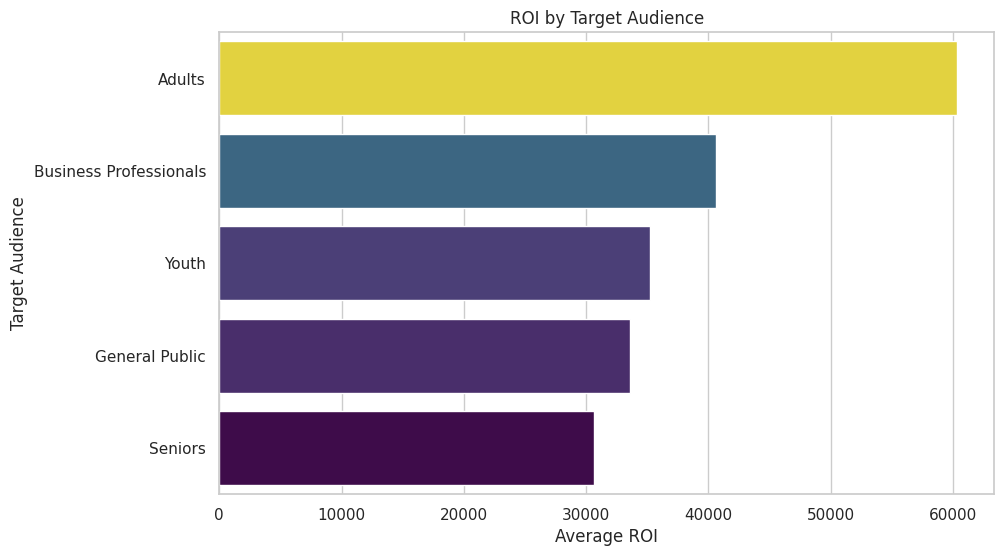

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_performance.values, y=segment_performance.index, palette='viridis', hue=segment_performance.values, legend=False)
plt.title('ROI by Target Audience')
plt.xlabel('Average ROI')
plt.ylabel('Target Audience')
plt.show()

In [27]:
# Evaluating campaign type performance
campaign_type_performance = df.groupby('Campaign Type')['ROI'].mean().sort_values(ascending=False)
print("Campaign Type Performance:\n", campaign_type_performance)

Campaign Type Performance:
 Campaign Type
Email            44947.137099
Social Media     39232.765671
Advertisement    38383.094828
Name: ROI, dtype: float64


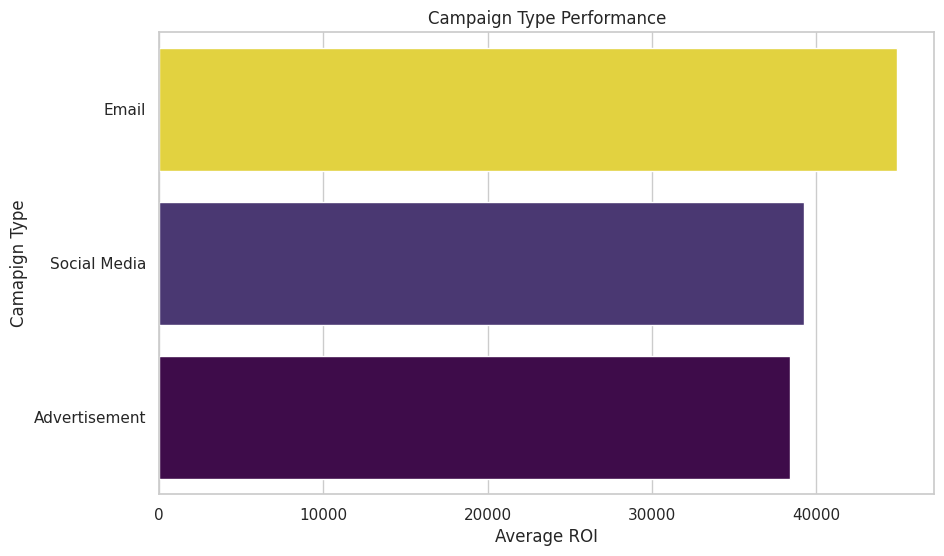

In [28]:
# interactive bar plot for Campaign Type performance!
import plotly.express as  px
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=campaign_type_performance.values, y=campaign_type_performance.index, palette='viridis', hue=campaign_type_performance.values, legend=False)
plt.title('Campaign Type Performance')
plt.xlabel('Average ROI')
plt.ylabel('Camapign Type')
plt.show()


As we can see Email campaign type performed better and yeilded greater ROI.

In [29]:
# Evaluating ad content performance!
ad_content_performance = df.groupby('Ad Content Type')['ROI'].mean().sort_values(ascending=False)
print("Ad Content Performance:\n", ad_content_performance)

Ad Content Performance:
 Ad Content Type
Text        44549.261750
Image       42389.358435
Video       39843.611119
Carousel    36904.860763
Name: ROI, dtype: float64


 Ad Content in form of text resulted in greater ROI. This shows people prefer ad in the form of text rather than in form of any other type.

In [30]:
# Interactive bar plot for Ad Content type performance!
sns.set(style="whitegrid")
fig = px.bar(ad_content_performance.reset_index(), x='Ad Content Type', y='ROI', labels={'index': 'Ad Content Type', 'ROI': 'ROI'}, title='Ad Content Type Performance')
fig.show()

In [31]:
# Performance by device type
device_performance = df.groupby('Device Type')['ROI'].mean().sort_values(ascending=False)
print("Device Performance:\n", device_performance)

Device Performance:
 Device Type
Desktop    44545.648563
Tablet     41021.246012
Mobile     36545.167669
Name: ROI, dtype: float64


Desktop device type yeilded higher ROI as compared to others, suggesting that desktop users are more likely to convert.

In [32]:
# Interactive bar plot for device type performance!
sns.set(style="whitegrid")
fig = px.bar(device_performance.reset_index(), x='Device Type', y='ROI', labels={'index': 'Device Type', 'ROI': 'ROI'}, title='Device Type Performance')
fig.show()

In [33]:
# Performance by Geographic region!
geographic_performance = df.groupby('Geographic Region')['ROI'].mean().sort_values(ascending=False)
print("Geographic Performance:\n", geographic_performance)

Geographic Performance:
 Geographic Region
Oceania          54312.677262
South America    44770.482614
Europe           42878.251848
North America    38636.502466
Africa           32222.204217
Asia             30656.176500
Name: ROI, dtype: float64


Campaign targeting the Oceania region resulted in higher ROI, indicating marketing efforts in Oceania are particularly effective.

In [34]:
# Interactive bar plot for Geographic Region!
sns.set(style="whitegrid")
fig = px.bar(geographic_performance.reset_index(), x='Geographic Region', y='ROI', labels={'index': 'Geographic Region', 'ROI': 'ROI'}, title='Geographic Region Performance')
fig.show()

## Relational Analysis
In this section, we explore the relationships between various features of our marketing campaigns and the Return on Investment (ROI). Understanding these relationships is crucial for identifying which factors most strongly influence campaign profitability. By analyzing these correlations, we aim to uncover insights that can guide future campaign strategies, optimize budget allocations, and improve overall marketing efficiency.

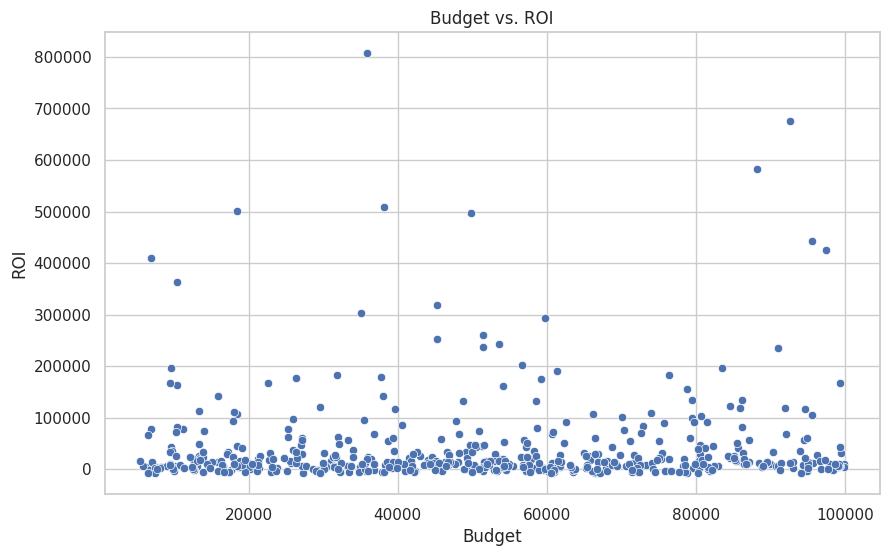

In [35]:
# Analyzing the relationship between Budget and ROI!
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot Budget vs ROI
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Budget', y='ROI', data=df)
plt.title('Budget vs. ROI')
plt.xlabel('Budget')
plt.ylabel('ROI')
plt.show()

In [36]:
# correlation b/w Budget and ROI
budget_roi_corr = df[['Budget', 'ROI']].corr().iloc[0, 1]
print(f"Correlation between Budget and ROI: {budget_roi_corr:.2f}")

Correlation between Budget and ROI: 0.03


It indicates positive but weak relationship, not strong enough to make assumptions and predections.

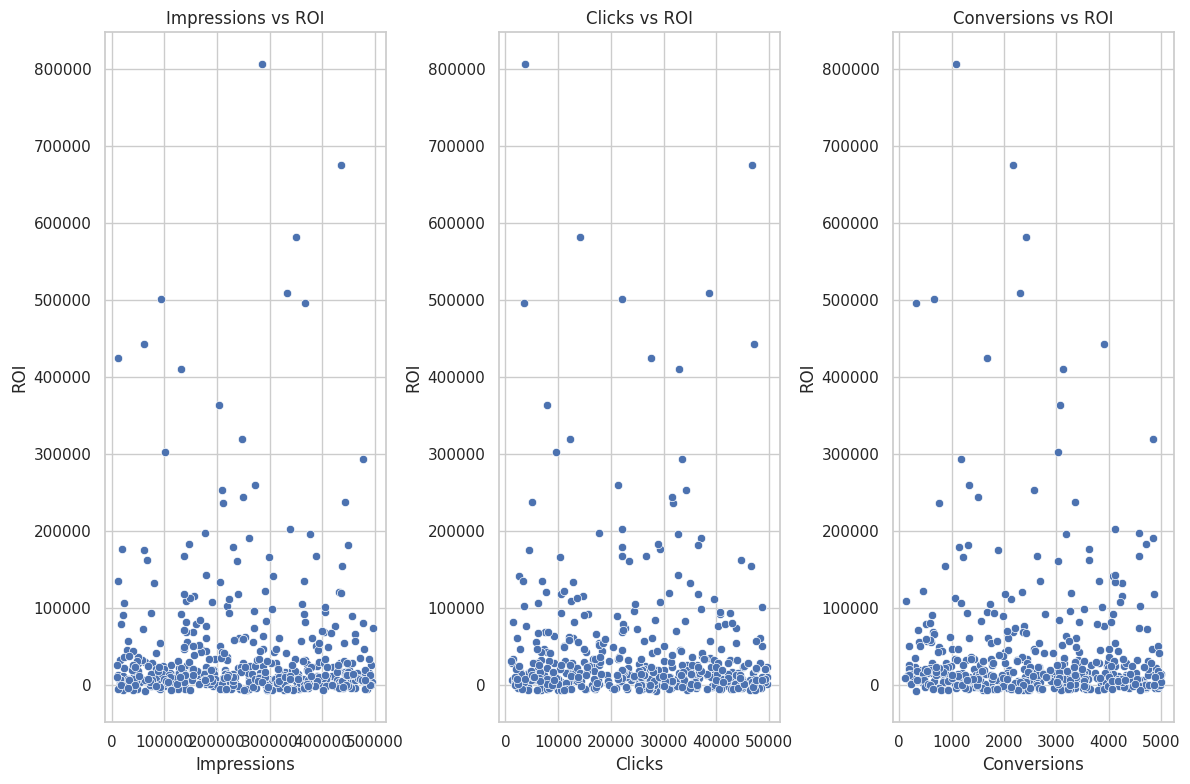

In [37]:
# Impressions, Clicks, and Conversions relationship b/w ROI.

plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
sns.scatterplot(x='Impressions', y='ROI', data=df)
plt.xlabel('Impressions')
plt.ylabel('ROI')
plt.title('Impressions vs ROI')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Clicks', y='ROI', data=df)
plt.xlabel('Clicks')
plt.ylabel('ROI')
plt.title('Clicks vs ROI')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Conversions', y='ROI', data=df)
plt.xlabel('Conversions')
plt.ylabel('ROI')
plt.title('Conversions vs ROI')
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

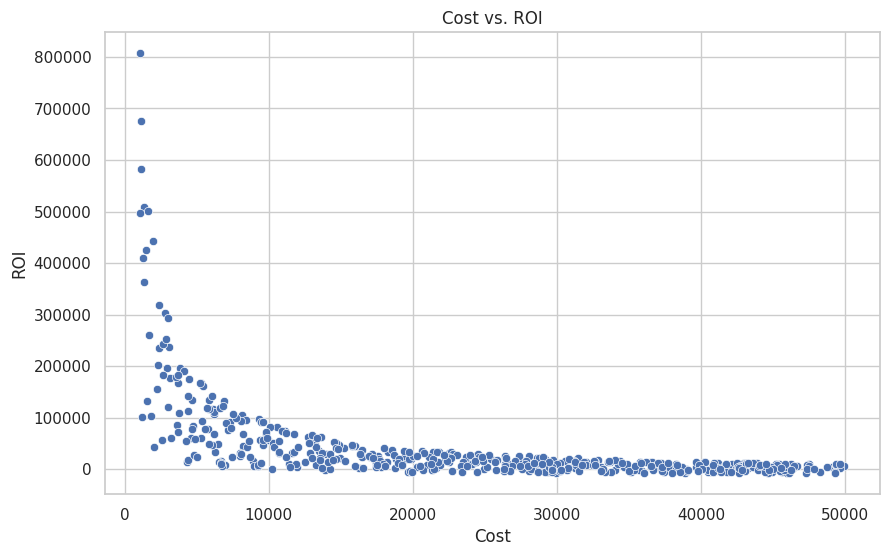

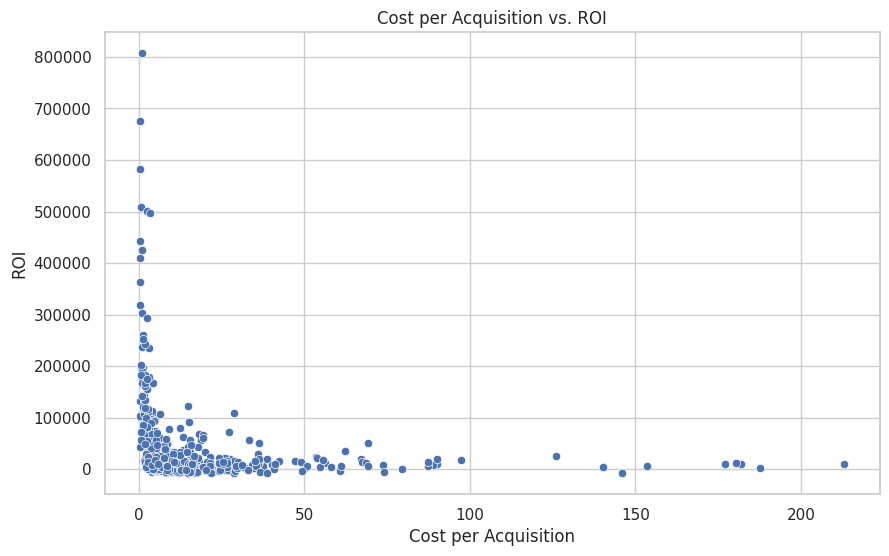

In [38]:
# Analyzing impacts of Cost and Cost per acquisition on ROI!
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cost', y='ROI', data=df)
plt.title('Cost vs. ROI')
plt.xlabel('Cost')
plt.ylabel('ROI')
plt.show

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cost per acquisition', y='ROI', data=df)
plt.title('Cost per Acquisition vs. ROI')
plt.xlabel('Cost per Acquisition')
plt.ylabel('ROI')
plt.show

# Conversion Funnel Analysis
In this section, we examine the key stages of the conversion funnel for our marketing campaigns:

Impressions: The total number of times our ads were displayed to potential customers. This stage represents the top of the funnel, where the audience is first exposed to our marketing efforts.

Clicks: The number of times users clicked on our ads after viewing them. This stage indicates the level of interest generated by the ad content and its relevance to the target audience.

Conversions: The final stage in the funnel, where clicks are converted into valuable actions, such as purchases or sign-ups. This stage is the most critical, as it directly impacts the campaign’s ROI.

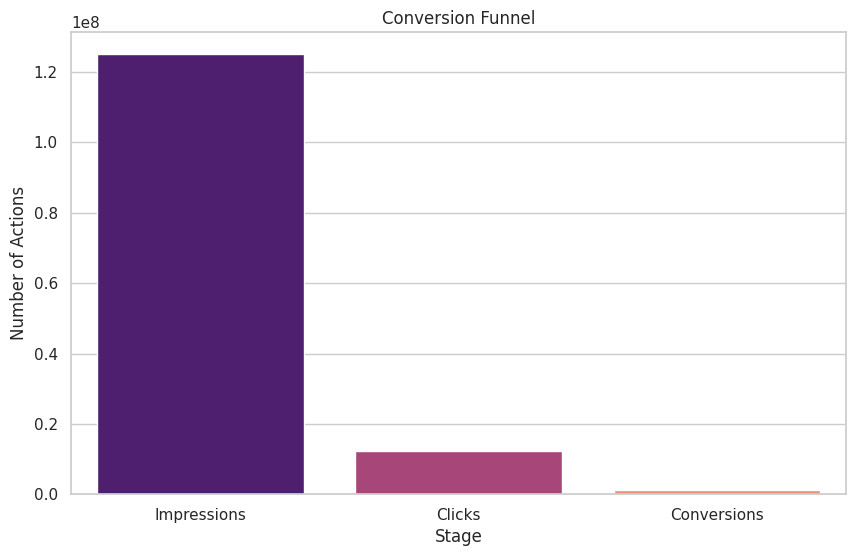

In [39]:
#summarizing the funnel data
funnel_data = df[['Impressions', 'Clicks', 'Conversions']].sum()

# Plotting the conversion funnel
plt.figure(figsize=(10, 6))
sns.barplot(x=funnel_data.index, y=funnel_data.values, palette='magma', hue=funnel_data.index)
plt.title('Conversion Funnel')
plt.xlabel('Stage')
plt.ylabel('Number of Actions')
plt.show()

# Conclusion and Recommendations
Based on the analysis conducted, we can draw several key insights and recommendations to optimize future marketing campaigns :

**High-Performing Strategies:**

* Prioritize Oceania: Given the superior ROI observed in the Oceania region, allocate a larger portion of the marketing budget and tailor campaigns to this region's preferences. Also observe the marketing startegies used in Oceania and impliment them in other regions.
* Target Adults: Focus marketing efforts on adult demographics, as they exhibit a higher conversion rate.
* Leverage Email and Social Media: Continue utilizing email and social media campaigns, as they consistently deliver the highest ROI.
* Emphasize Text and Image Ads: Create engaging and informative ad content in text and image formats to resonate with the target audience.
* Optimize for Desktop: Ensure that campaigns are optimized for desktop users, considering their higher conversion rates.

**Areas for Further Investigation:**

* **Budget Optimization**: While a positive correlation exists between budget and ROI, further analysis is needed to determine the optimal budget allocation for maximizing returns, as the value of co-efficient is not strong enough to make assumptions.
* **Competitive Analysis**: Conduct a thorough analysis of competitors' marketing strategies to identify opportunities for differentiation and gain a competitive edge.
* **Conversion Funnel Optimization**: While the marketing campaigns generated a significant number of impressions and clicks, the conversion rate remains disappointingly low. This indicates a potential bottleneck in the lower stages of the conversion funnel.

**Possible Recommendations for Converison funnel optimization:**

* **Landing Page Optimization**
* **Targeting Refinement**
* **Offer and Messaging Alignment**
* **Checkout Process Optimization**
* **Retargeting Campaigns**

**Actionable Recommendations:**

- Increase budget allocation for Oceania by 15% and conduct A/B testing to optimize ad creative for this region.
- Develop targeted campaigns specifically for adult demographics, focusing on specific interests/needs.
- Maintain a strong emphasis on email and social media marketing, exploring new strategies within these channels.
- Prioritize text and image ad formats, while continuing to experiment with other formats for potential growth.
- Ensure all campaigns are optimized for desktop users, while also exploring ways to improve mobile conversion rates.